# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [35]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [36]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    func = x*x*numpy.sin(x)
    return(func)

Ensure your function works with numpy arrays:

In [37]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [38]:
def g(x):
    '''Analytical integral of f(x).'''
    int_func = 2*x*numpy.sin(x) - (x**2-2)*numpy.cos(x) -2
    return(int_func)


Check your solution with the same numpy array:

In [39]:
assert g(0) == 0.

In [40]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [41]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    ans = g(xmax) - g(xmin)
    return(ans)
    
    # YOUR CODE HERE

Check your analytic function:

In [42]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [51]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax-xmin)/N
    ends=(dx/6)*(f(xmax)+f(xmin)+4*f(xmax-dx/2))
    mid = 0
    for i in range(1,N):
        mid = mid + 4*f(xmin+((2*i-1)*(dx/2))) + 2*f(xmin+(i)*dx)
    ans = ends + (dx/6)*mid                 
    return(ans)
                        

1.096590995599108

Make sure you have implemented Simpson's rule correctly:

In [49]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [50]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


<function matplotlib.pyplot.show>

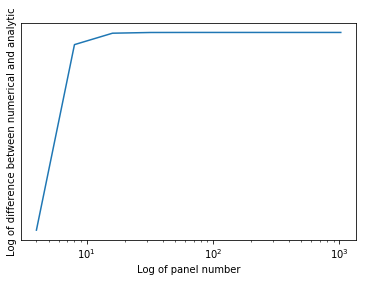

In [70]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
y=[]
for i in panel_counts:
    y.append(result_analytic-integrate_numeric(x1,x0,i))
plt.loglog(panel_counts,y)
plt.xlabel("Log of panel number")
plt.ylabel("Log of difference between numerical and analytic")
plt.title
plt.show

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

At first (rougly up to order 10) increasing the number of panels greatly increases the accuracy of the numerical method, as shown by the previously plotted graph. While increasing the bins further does in fact increase the accuracy of the numerical method, diminishing returns set in, by order 10^2 even the loglog plot shows almost no improvement. If there are too many panels two things can occur - firstly, the accuracy could in fact decrease due to random error caused by lack of memory, rendering the computer unable to store enough information in standard form; also increasing the number of panels too much will result in a massive slowdown in calculation time due to increasing numbers of loop iterations.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Trapezium rule would also increase accuracy, but at a slower rate compared to using simpson's numerical method.